# Caption (word embedding)

Guardiamo anche alla sintassi/semantica delle parole

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('../dataset/influencer_dataset.csv')
print("Numero di esempi: ", len(dataset))
dataset.head()

Numero di esempi:  11905


,index,username,photo_id,followed_by,hashtag,tag,caption,is_video,timestamp,n_comment,n_likes,target
0,0,viniciusjunior,viniciusjunior0,9012479,[],[],Obrigado pelo carinho de sempre a todos que ac...,False,1582322398,1043,386524,standard
1,1,viniciusjunior,viniciusjunior1,9012479,[],[],“Algumas pessoas querem que algo aconteça outr...,False,1582141911,1564,522107,standard
2,2,viniciusjunior,NaN,9012479,"['#VOLTAFOOTBALL', '#FIFA20']","['@rodrygogoes', '@dani.carvajal.2', '@fedeeva...",Mi amigo y yo llevamos el equipo a las calles ...,True,1581615465,395,179341,standard
3,3,viniciusjunior,NaN,9012479,[],[],💪🏾,True,1581532095,2303,380096,standard
4,4,viniciusjunior,viniciusjunior4,9012479,[],['@pedroscooby'],Day off 🏄🏼‍♂️ tava pro surf das ondas gigantes...,False,1581440777,895,387117,standard


#### Aggiungo come post sponsorizzati quelli che contengono come hashtag `adv`, `ad` etc.

In [3]:
mask = dataset.hashtag.str.lower().str.contains("'#adv'|'#ad'|'#sponsored'|'#supplied'")
column_name = 'target'
dataset.loc[mask, column_name] = 'paid'
# dataset.loc[mask_adv | mask_sponsored | mask_supplied, column_name] = 'paid'

#### Aggiungo i post dei prend come fossero a pagamento

In [4]:
brand_list = ['victoriassecret', 'nikefootball', 'nike',
        'nikebasketball', 'chanelofficial', 'gucci',
        'zara', 'louisvuitton', 'adidas',
       'adidasfootball', 'adidasoriginals', 'bmw',
       'mercedesbenz', 'kyliecosmetics', 'lamborghini',
       'versace', 'starbucks']

In [5]:
mask = dataset.username.str.lower().str.contains("|".join(brand_list))
column_name = 'target'
dataset.loc[mask, column_name] = 'paid'

#### Trasfromazione etichette in 0-1

In [6]:
# paid = 0
# standard = 1
label = LabelEncoder()
dataset['target'] = label.fit_transform(dataset['target'])

#### Costruzione dataset

In [7]:
X = dataset['caption'].values.astype('U') # U = unicode
y = dataset['target']

sentences_train, sentences_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

In [8]:
print('Esempi training standard: ', sum(y_train == 1))
print('Esempi training paid: ', sum((y_train == 0)))

Esempi training standard:  8564
Esempi training paid:  364


In [9]:
print('Esempi test standard: ', sum(y_test == 1))
print('Esempi test paid: ', sum(y_test == 0))

Esempi test standard:  2856
Esempi test paid:  121


In [10]:
print(sentences_train[0])
print()
print(sentences_train[1])

Emma GellerGreen 16 years later The Sheldon twins and swung by Central Perk to reflect on their time on the show

brasilzão de volta no feed 💚💙


### Tokenizzazione


In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [12]:
tokenizer = Tokenizer() # num_words=5000 size del vocabolario = 5000
tokenizer.fit_on_texts(sentences_train)

In [13]:
X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)

"""
+ 1 perchè abbiamo l'indice '0' riservato per "pad" le frasi in modo
che siano tutte lughe allo stesso modo
"""
vocab_size = len(tokenizer.word_index) + 1
print(sentences_train[0])
print(X_train[0])
# L'indice assegnato alla parola è basato sulla popolarità secondo cui compare nel corpus

Emma GellerGreen 16 years later The Sheldon twins and swung by Central Perk to reflect on their time on the show
[5414, 11689, 782, 146, 1189, 1, 11690, 4331, 4, 7266, 22, 3548, 11691, 2, 2390, 15, 113, 57, 15, 1, 118]


In [14]:
tokenizer.word_index['the'], tokenizer.word_index['to'], tokenizer.word_index['on'] 

(1, 2, 15)

##### In questa situazione ogni esempo potrebbe avere lunghezza differente
(nel caso della matrice sparsa gli esempi erano tutti della stessa dimensione)

Ricorda:
Nella matrice sparsa le righe erano nei "count vector" qua invece il valore di una cella indica semplicemente la popolarità secondo cui quella parola compare

In [15]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

Impostiamo tutte le caption alla stessa lunghezza, aggiungendo degli zero a quelle più corte di 100 parole e togliendo delle parole da quelle più lunghe di 100

In [16]:
X_train = pad_sequences(X_train, padding='post', maxlen=100)
X_test = pad_sequences(X_test, padding='post', maxlen=100)

In [17]:
print(X_train[0])

[ 5414 11689   782   146  1189     1 11690  4331     4  7266    22  3548
 11691     2  2390    15   113    57    15     1   118     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0]


In [18]:
y_train.value_counts()

1    8564
0     364
Name: target, dtype: int64

In [19]:
y_test.value_counts()

1    2856
0     121
Name: target, dtype: int64

### Inflate

(migliora la classificazione per gli esempi paid)

In [20]:
from imblearn.over_sampling import SMOTE

In [21]:
sm = SMOTE(random_state=2)
X_train, y_train = sm.fit_sample(X_train, y_train.ravel())
X_train.shape, y_train.shape

((17128, 100), (17128,))

### Building model

In [22]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, GlobalMaxPool1D

In [23]:
embedding_dim = 50

model = Sequential()
model.add(Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, # size del vettore di output
                           input_length=100 #maxLen
                   ))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [24]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 50)           1719750   
_________________________________________________________________
flatten (Flatten)            (None, 5000)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                50010     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 1,769,771
Trainable params: 1,769,771
Non-trainable params: 0
_________________________________________________________________


In [26]:
history = model.fit(X_train, y_train,
                    epochs=7,
                    verbose=1,
                    validation_data=(X_test, y_test),
                    batch_size=10)

Train on 17128 samples, validate on 2977 samples
Epoch 1/7
17128/17128 [==============================] - 26s 2ms/sample - loss: 0.5422 - accuracy: 0.7247 - val_loss: 0.4433 - val_accuracy: 0.8035
Epoch 2/7
17128/17128 [==============================] - 26s 2ms/sample - loss: 0.2032 - accuracy: 0.9235 - val_loss: 0.6787 - val_accuracy: 0.7575
Epoch 3/7
17128/17128 [==============================] - 27s 2ms/sample - loss: 0.0473 - accuracy: 0.9869 - val_loss: 0.9432 - val_accuracy: 0.7440
Epoch 4/7
17128/17128 [==============================] - 31s 2ms/sample - loss: 0.0198 - accuracy: 0.9950 - val_loss: 1.7952 - val_accuracy: 0.6292
Epoch 5/7
17128/17128 [==============================] - 29s 2ms/sample - loss: 0.0130 - accuracy: 0.9968 - val_loss: 1.3185 - val_accuracy: 0.7464
Epoch 6/7
17128/17128 [==============================] - 30s 2ms/sample - loss: 0.0105 - accuracy: 0.9975 - val_loss: 2.0909 - val_accuracy: 0.5892
Epoch 7/7
17128/17128 [==============================] - 28s 2m

In [27]:
model.save('word-embedding.h5')

In [28]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9984
Testing Accuracy:  0.6268


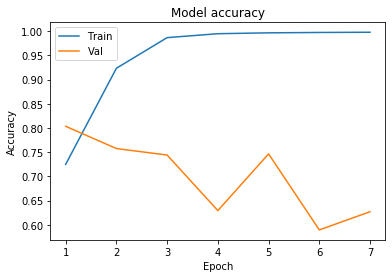

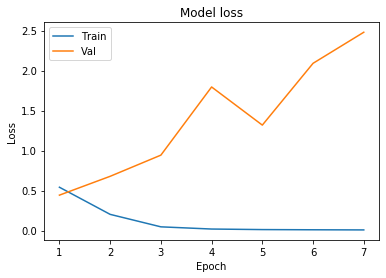

In [29]:
# Plot training & validation accuracy
epoch_range = range(1, 8)
plt.plot(epoch_range, history.history['accuracy'])
plt.plot(epoch_range, history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss
plt.plot(epoch_range, history.history['loss'])
plt.plot(epoch_range, history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [30]:
from sklearn.metrics import accuracy_score

y_pred = model.predict_classes(X_test)
accuracy_score(y_test, y_pred)

0.6268055089015788

(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a5087ccf8>)

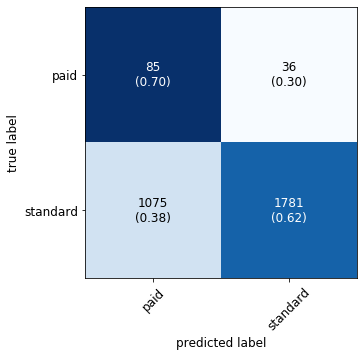

In [31]:
class_names = ['paid', 'standard']
font = {'size': 12}
matplotlib.rc('font', **font)
mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=mat, figsize=(5,5), class_names = class_names, show_normed=True)

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.07      0.70      0.13       121
           1       0.98      0.62      0.76      2856

    accuracy                           0.63      2977
   macro avg       0.53      0.66      0.45      2977
weighted avg       0.94      0.63      0.74      2977



### New model with max-pooling

In [33]:
embedding_dim = 50

model = Sequential()
model.add(Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=100, #maxLen
                   ))
#model.add(Flatten())
model.add(GlobalMaxPool1D()) #riduciamo la grandezza dell'input vector, vediamo se generalizziamo meglio
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [34]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [35]:
history = model.fit(X_train, y_train,
                    epochs=7,
                    verbose=1,
                    validation_data=(X_test, y_test),
                    batch_size=10)

Train on 17128 samples, validate on 2977 samples
Epoch 1/7
17128/17128 [==============================] - 29s 2ms/sample - loss: 0.5315 - accuracy: 0.7244 - val_loss: 0.5151 - val_accuracy: 0.6688
Epoch 2/7
17128/17128 [==============================] - 29s 2ms/sample - loss: 0.2924 - accuracy: 0.8904 - val_loss: 0.2421 - val_accuracy: 0.9237
Epoch 3/7
17128/17128 [==============================] - 30s 2ms/sample - loss: 0.1306 - accuracy: 0.9599 - val_loss: 0.2394 - val_accuracy: 0.9140
Epoch 4/7
17128/17128 [==============================] - 30s 2ms/sample - loss: 0.0615 - accuracy: 0.9828 - val_loss: 0.3076 - val_accuracy: 0.8922
Epoch 5/7
17128/17128 [==============================] - 30s 2ms/sample - loss: 0.0302 - accuracy: 0.9925 - val_loss: 0.3891 - val_accuracy: 0.8603
Epoch 6/7
17128/17128 [==============================] - 30s 2ms/sample - loss: 0.0159 - accuracy: 0.9968 - val_loss: 0.3288 - val_accuracy: 0.8928
Epoch 7/7
17128/17128 [==============================] - 30s 2m

In [36]:
model.save('word-embedding-max-pool.h5')

In [37]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9984
Testing Accuracy:  0.8794


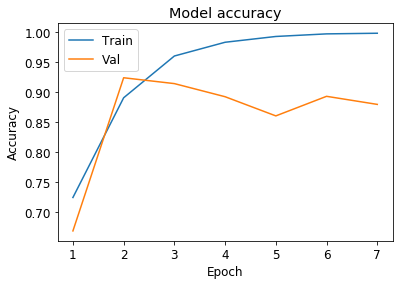

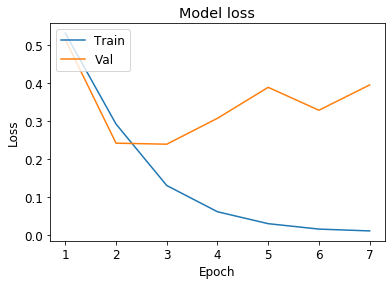

In [38]:
# Plot training & validation accuracy
epoch_range = range(1, 8)
plt.plot(epoch_range, history.history['accuracy'])
plt.plot(epoch_range, history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss
plt.plot(epoch_range, history.history['loss'])
plt.plot(epoch_range, history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [39]:
from sklearn.metrics import accuracy_score

y_pred = model.predict_classes(X_test)
accuracy_score(y_test, y_pred)

0.8794088008061807

(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a50f1f240>)

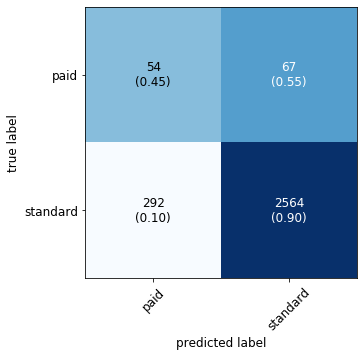

In [40]:
class_names = ['paid', 'standard']
font = {'size': 12}
matplotlib.rc('font', **font)
mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=mat, figsize=(5,5), class_names = class_names, show_normed=True)

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.16      0.45      0.23       121
           1       0.97      0.90      0.93      2856

    accuracy                           0.88      2977
   macro avg       0.57      0.67      0.58      2977
weighted avg       0.94      0.88      0.91      2977

